# Heart Failure Analysis
Here you can find the description of all the tasks. Same info and more can be found on this Project [Page](https://cms.master.school/final-project-jan23)

First review the project on this page and if you decide to work on this dataset follow the steps mentioned on above Project page

## The story behind The Data

Cardiovascular diseases (CVDs) are the number 1 cause of death all over the world, taking an estimated **17.9** million lives each year, which accounts for 31% of all deaths worldwide.
Heart failure is a common event caused by CVDs and this dataset contains 12 features that can be used to predict mortality by heart failure, as well as analyze and understand the main factor for these diseases.

Most cardiovascular diseases can be prevented by addressing behavioural risk factors such as tobacco use, unhealthy diet and obesity, physical inactivity and harmful use of alcohol using population-wide strategies.

People with CV disease or who are at high cardiovascular risk (due to the presence of one or more risk factors such as hypertension, diabetes, hyperlipidaemia or already established disease) need early detection and management wherein a great analysis of it can be of great help.

Deep Analysis of Heart Failure Data 

In [10]:
# Let's see how we can easily query the data
# Start working here if you choose to use Python for this part of the project
# Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
# loading datasets and see their "head"
base_metrics_patient_df = pd.read_csv("base_metrics_patient.csv")
blood_metrics_df = pd.read_csv("blood_metrics_df.csv")
demographic_df = pd.read_csv("demographic_data_health.csv")
follow_up_df = pd.read_csv("follow_up_df.csv")

In [12]:
# checking the columns of base_metrics_patient_df
base_metrics_patient_df.head(3)

smoking  ejection_fraction  ...  diabetes  serum_creatinine
0        0                 20  ...         0               1.9
1        0                 38  ...         0               1.1
2        1                 20  ...         0               1.3

[3 rows x 8 columns]

In [13]:
# changing the name column of uniqueID for blood_metrics because it is not correct and it can not be merged to other tables
blood_metrics_df.rename(columns = {'unqiueID':'uniqueID'}, inplace = True)

In [14]:
# merging the tables
df1 = base_metrics_patient_df.merge(blood_metrics_df, on = 'uniqueID')

In [15]:
# merging the tables
df2 = df1.merge(demographic_df, on = 'uniqueID' )

In [16]:
# merging the tables
df = df2.merge(follow_up_df, on = 'uniqueID')

In [17]:
# checking the columns of df
df.head(4)

smoking  ejection_fraction  serum_sodium  ...  sex  time  DEATH_EVENT
0        0                 20           130  ...    1     4            1
1        0                 38           136  ...    1     6            1
2        1                 20           129  ...    1     7            1
3        0                 20           137  ...    1     7            1

[4 rows x 14 columns]

 I used describe() to have a better idea of each column for statistical analysis. 

In [18]:
# statistical analysis 
df.describe()

smoking  ejection_fraction  ...        time  DEATH_EVENT
count  299.00000         299.000000  ...  299.000000    299.00000
mean     0.32107          38.083612  ...  130.260870      0.32107
std      0.46767          11.834841  ...   77.614208      0.46767
min      0.00000          14.000000  ...    4.000000      0.00000
25%      0.00000          30.000000  ...   73.000000      0.00000
50%      0.00000          38.000000  ...  115.000000      0.00000
75%      1.00000          45.000000  ...  203.000000      1.00000
max      1.00000          80.000000  ...  285.000000      1.00000

[8 rows x 14 columns]

As seen in the statistical analysis, "creatinine_phosphokinase" and "serum creatinine" are significantly skewed. All the other factores almost shows the normal distribution, since mean is equal to their respective medians.

I wanted to know the best range for each factor. Based on my search, I found the meaning of each factor and its range. It helps me to decide for finding the outliers. I decided to remove the outliers to get a better analysis of the data. Especially in some columns, many outliers were found such as creatinine_phosphokinase. However, I found removing the outliers did not change the result except for ejection fraction and platelets. Therefore, I did not remove the outliers for getting a precise result and decision. In addition, removing the outliers decreases one-third of the data which causes missing a large part of the data. Without removing the outliers, creatinine_phosphokinase, and serum_creatinine show a skewed distribution.

The measure of serum creatinine may also be used to estimate how quickly the kidneys filter blood. The average serum creatinine level ranges between 0.74 – 1.35 mg/dL in adult men, while it should lie between 0.59 – 1.04 mg/dL in healthy adult women. An increased serum creatinine level is indicative of poor kidney health. 

Creatine phosphokinase (CPK) is an enzyme in the body. It is found mainly in the heart, brain, and skeletal muscle. The normal range is 10 to 120 micrograms per liter (mcg/L). It is found mainly in the heart, brain, and skeletal muscle.

The normal range for blood sodium levels is 135 to 145 milliequivalents per liter (mEq/L). 

Ejection fraction: The left ventricle is the heart's main pumping chamber. It pumps oxygen-rich blood up into your body's main artery (aorta) to the rest of the body. According to the American Heart Association, a normal ejection fraction is about 50% to 75%. An ejection fraction below 40 percent means your heart isn't pumping enough blood and may be failing.


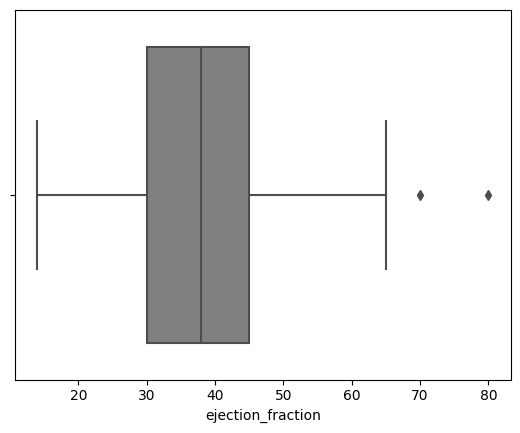

In [19]:
# finding the outliers by box plot 
sns.boxplot(x = df['ejection_fraction'], color = 'grey')
plt.show()

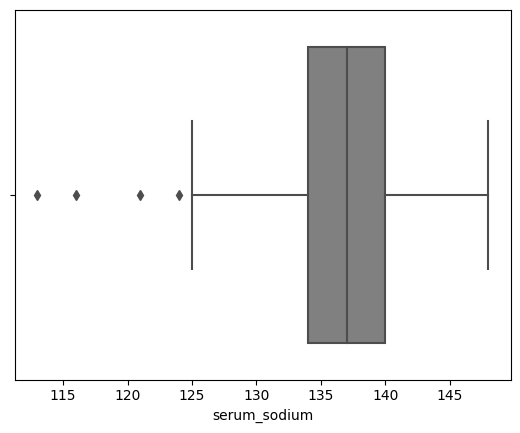

In [20]:
# finding the outliers by box plot 
sns.boxplot(x = df['serum_sodium'], color = 'grey')
plt.show()

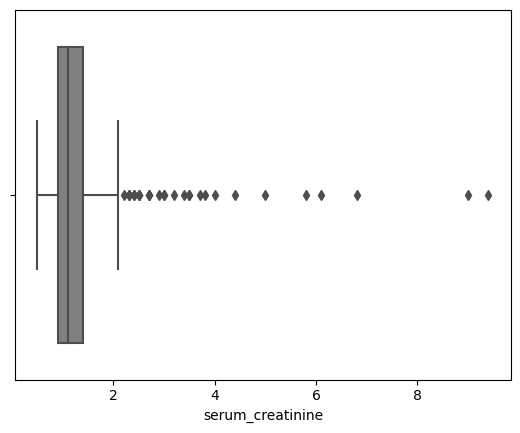

In [21]:
# finding the outliers by box plot 
sns.boxplot(x = df['serum_creatinine'], color = 'grey')
plt.show()

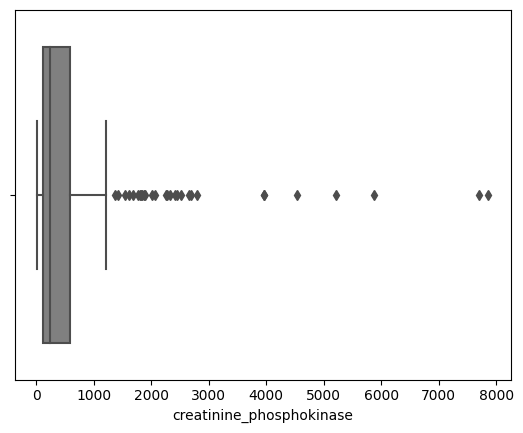

In [22]:
# finding the outliers by box plot
sns.boxplot(x = df['creatinine_phosphokinase'], color = 'grey')
plt.show()


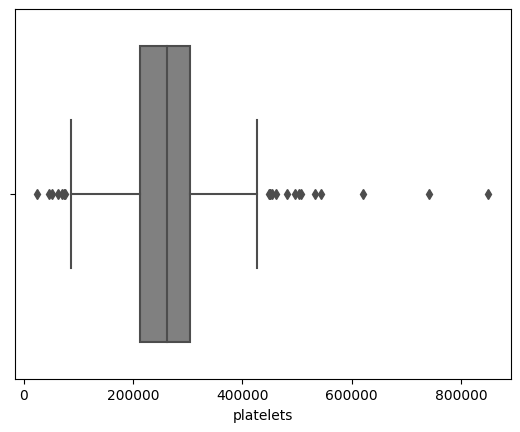

In [23]:
# finding the outliers by box plot
sns.boxplot(x = df['platelets'], color = 'grey')
plt.show()

I found removing the outliers did not change the result except for ejection fraction and platelets. Therefore, I did not remove the outliers for getting a precise result and decision. In addition, removing the outliers decreases one-third of the data which causes missing a large part of the data. Without removing the outliers, creatinine_phosphokinase, and serum_creatinine show a skewed distribution.

Finding the null data in the tables, I used the isnull for any missed value. 

In [24]:
# checking for missed value
df.isnull().sum()

smoking                     0
ejection_fraction           0
serum_sodium                0
platelets                   0
creatinine_phosphokinase    0
uniqueID                    0
diabetes                    0
serum_creatinine            0
anaemia                     0
high_blood_pressure         0
age                         0
sex                         0
time                        0
DEATH_EVENT                 0
dtype: int64

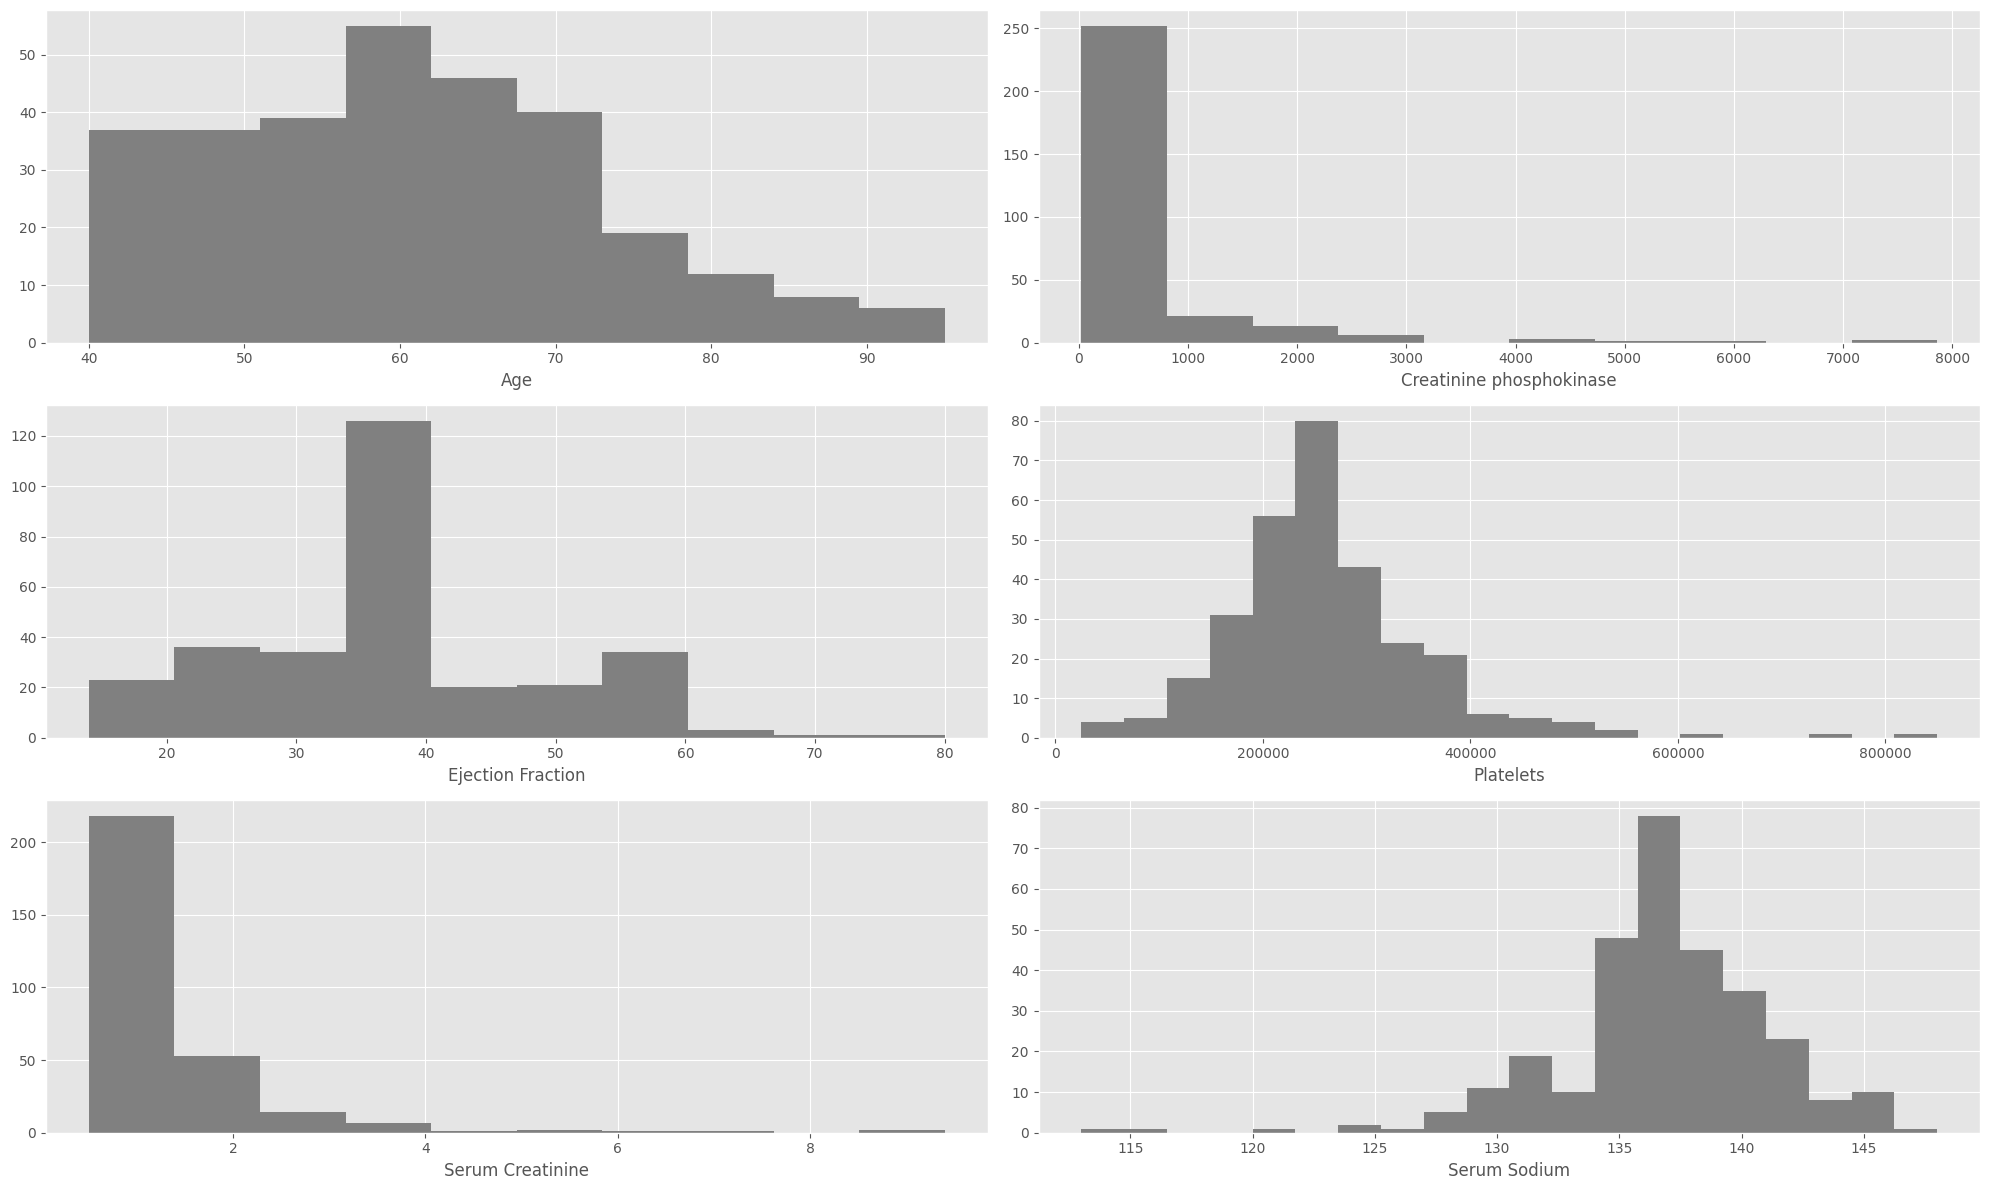

In [25]:
# plotting the features
plt.style.use('ggplot')
fig, axis  = plt.subplots(nrows = 3, ncols = 2, figsize = (20,12))

ax0, ax1, ax2, ax3, ax4, ax5 = axis.flatten()

ax0.hist(df['age'], color= 'grey')
ax0.set_xlabel('Age')

ax1.hist(df['creatinine_phosphokinase'],color= 'grey')
ax1.set_xlabel('Creatinine phosphokinase')

ax2.hist(df['ejection_fraction'],color= 'grey')
ax2.set_xlabel('Ejection Fraction')

ax3.hist(df['platelets'],color= 'grey', bins = 20)
ax3.set_xlabel('Platelets')

ax4.hist(df['serum_creatinine'],color= 'grey')
ax4.set_xlabel('Serum Creatinine')

ax5.hist(df['serum_sodium'],color= 'grey', bins = 20)
ax5.set_xlabel('Serum Sodium')

plt.tight_layout()

These two factors, creatinine_phosphokinase, and serum_creatinine show a skewed distribution. All the other factors almost show the normal distribution.

For finding the frequency of each column, the bar plots are applied. 

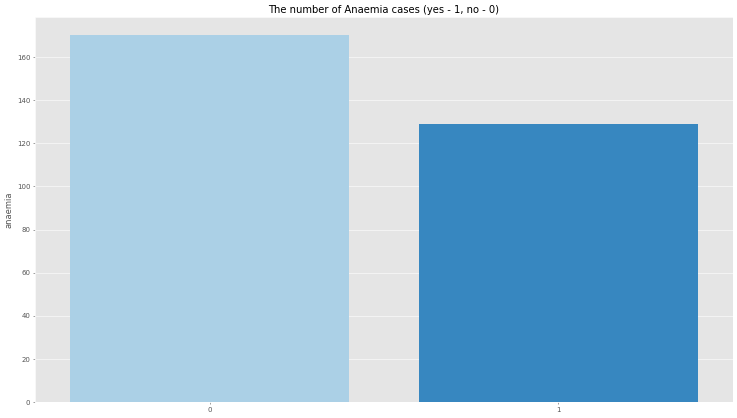

In [26]:
# the frequency of anaemia in patients
plt.figure(figsize = (18, 10), dpi = 50)
sns.barplot(x = df["anaemia"].value_counts().index,
            y = df["anaemia"].value_counts(),
            data = df, palette = "Blues",
            saturation = 1).set(title = "The number of Anaemia cases (yes - 1, no - 0)");

The frequency of non-anaemia is higher than the anaemia rate.

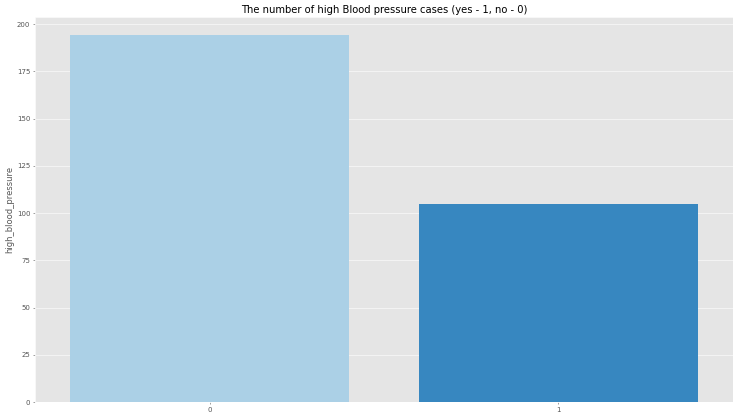

In [27]:
# the frequency of high blood pressure in patients
plt.figure(figsize = (18, 10), dpi = 50)
sns.barplot(x = df["high_blood_pressure"].value_counts().index,
            y = df["high_blood_pressure"].value_counts(),
            data = df, palette = "Blues",
            saturation = 1).set(title = "The number of high Blood pressure cases (yes - 1, no - 0)");

The frequency of low blood pressure is higher than the high blood pressure.

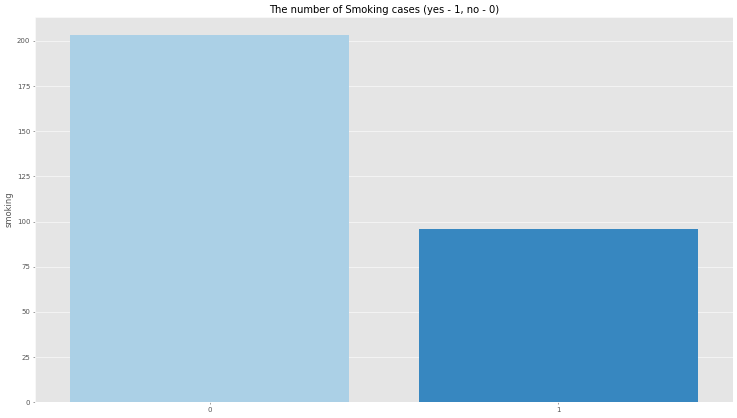

In [28]:
# the frequency of smoking in patients
plt.figure(figsize = (18, 10), dpi = 50)
sns.barplot(x = df["smoking"].value_counts().index,
            y = df["smoking"].value_counts(),
            data = df, palette = "Blues",
            saturation = 1).set(title = "The number of Smoking cases (yes - 1, no - 0)");

The frequency of non-smokers is higher than the smokers.

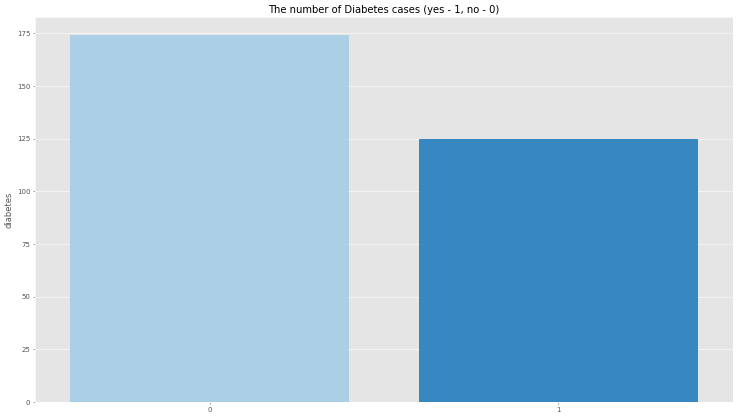

In [29]:
# the frequency of diabetes in patients
plt.figure(figsize = (18, 10), dpi = 50)
sns.barplot(x = df["diabetes"].value_counts().index,
            y = df["diabetes"].value_counts(),
            data = df, palette = "Blues",
            saturation = 1).set(title = "The number of Diabetes cases (yes - 1, no - 0)");

The frequency of non-diabetes is higher than the diabetes rate. 

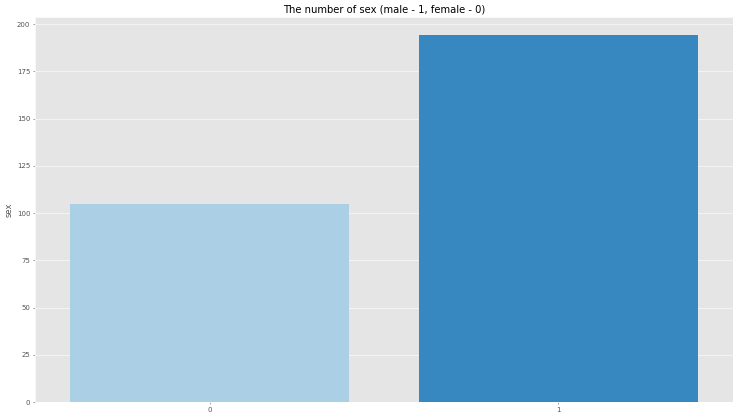

In [30]:
# the frequency of sex in patients 
plt.figure(figsize = (18, 10), dpi = 50)
sns.barplot(x = df["sex"].value_counts().index,
            y = df["sex"].value_counts(),
            data = df, palette = "Blues",
            saturation = 1).set(title = "The number of sex (male - 1, female - 0)");

The frequency of men is higher than that of women.

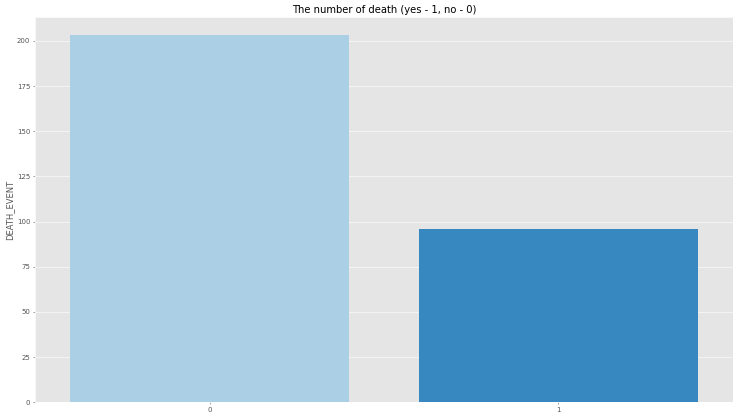

In [31]:
# the frequency of death rate in patients 
plt.figure(figsize = (18, 10), dpi = 50)
sns.barplot(x = df["DEATH_EVENT"].value_counts().index,
            y = df["DEATH_EVENT"].value_counts(),
            data = df, palette = "Blues",
            saturation = 1).set(title = "The number of death (yes - 1, no - 0)");

The frequency of non-death-events is higher than the death-events.

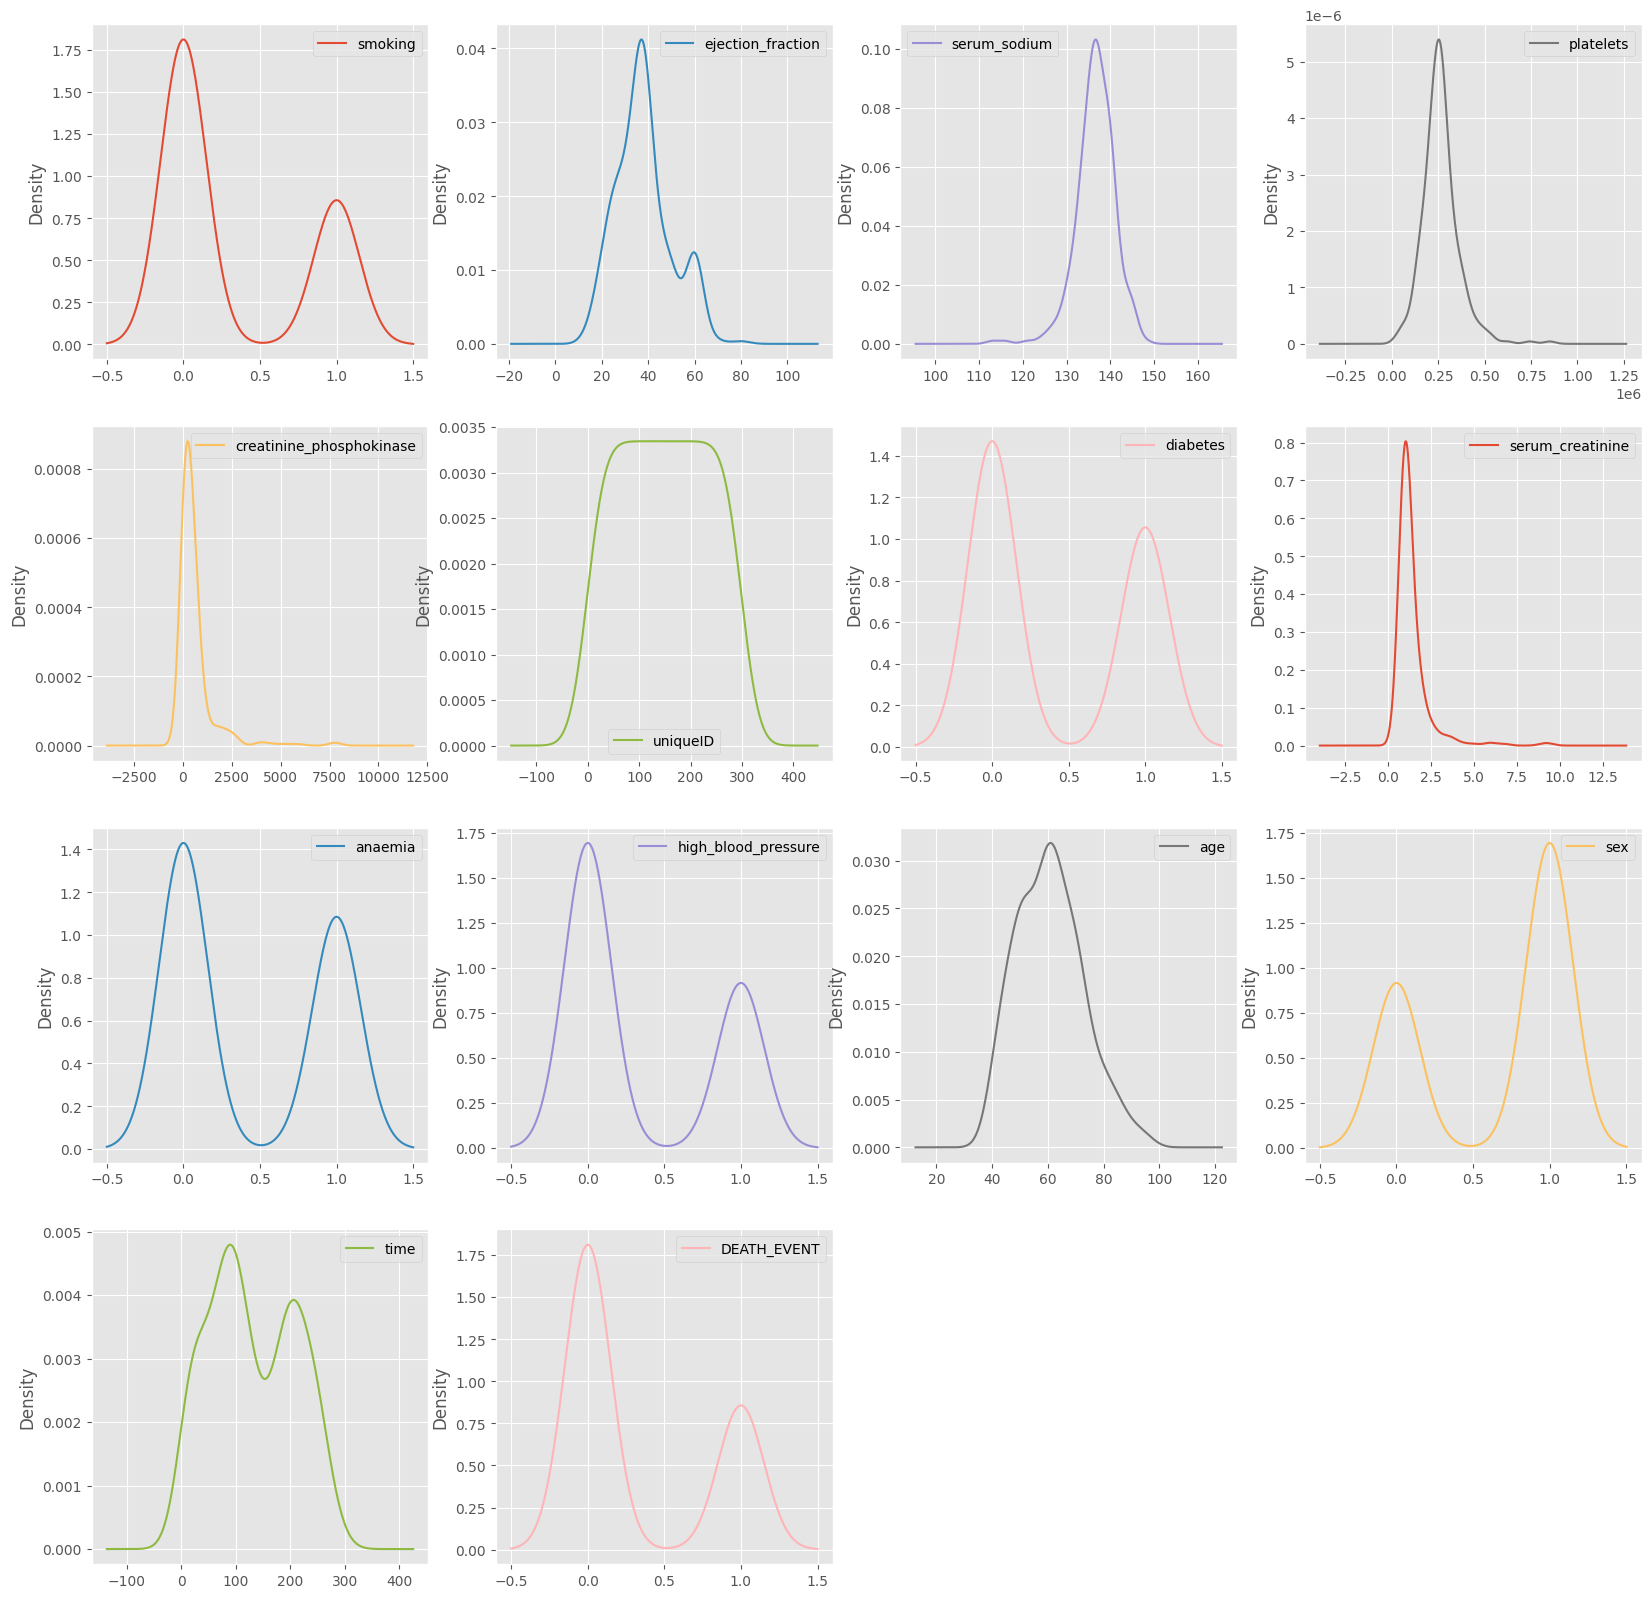

In [32]:
# checking the distribution of all the columns
fig = plt.figure(figsize=(20, 20))
ax = fig.gca()
df.plot(kind='density', subplots=True, layout=(4, 4), sharex=False, ax=ax)
plt.show()

Most columns indicate the normal distribution in the data, however, the serum_creatinine and creatinine_phosphokinase columns present a skewed distribution because of the outliers.

Analysis between the factors and death events. 

Percentage of Super Senior death: 72.22222222222221


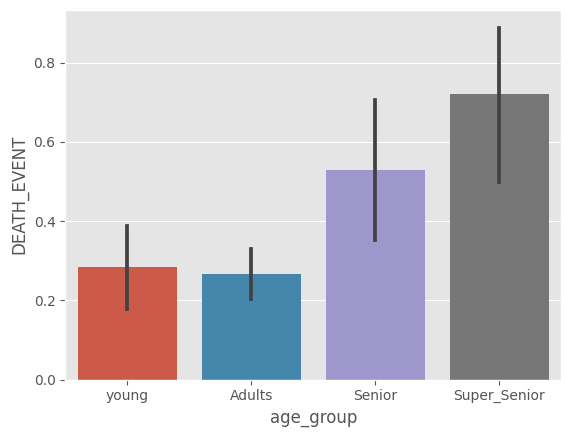

In [33]:
# checking the relationship between age category and death rate
bins = [40, 50, 70, 80,  np.nan]
labels = ['young','Adults', 'Senior', 'Super_Senior']

df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels)

print('Percentage of Super Senior death:', 
      df['DEATH_EVENT'][df['age_group']=='Super_Senior'].value_counts(normalize=True)[1]*100)

sns.barplot(x='age_group', y='DEATH_EVENT', data=df)
plt.show()

It can be seen that super_senior age who are older than 80 years old are more susceptible to heart failure.

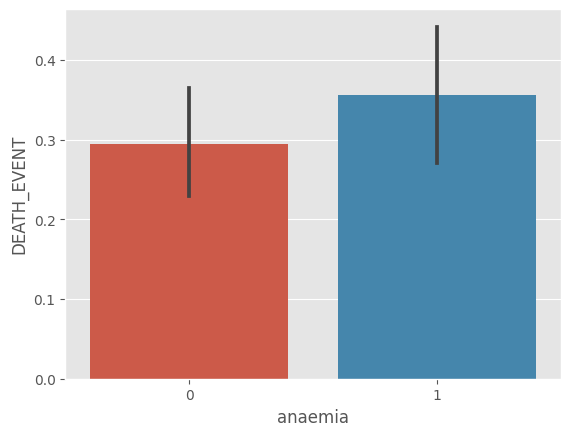

In [34]:
# checking the relationship between Anaemia and death rate
sns.barplot(x='anaemia', y='DEATH_EVENT', data=df)
plt.show()

The death rate of anaemia patients is higher than the non-anaemia ones. 

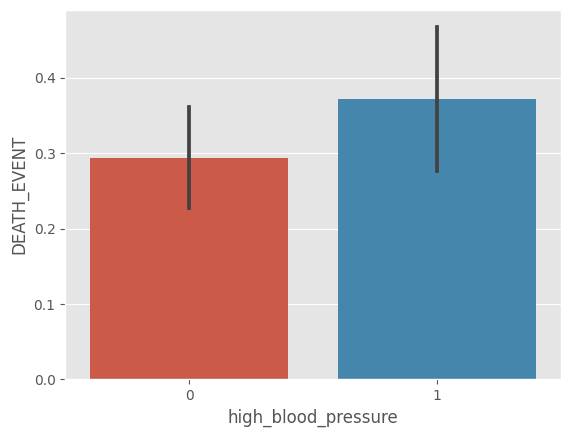

Percentage of people with Heart Failure having high blood pressure :  37.142857142857146


In [35]:
# checking the relationship between high blood pressure and death rate
sns.barplot(x='high_blood_pressure', y='DEATH_EVENT', data=df)
plt.show()
print('Percentage of people with Heart Failure having high blood pressure : ', df['DEATH_EVENT'][df['high_blood_pressure']==1].value_counts(normalize=True)[1]*100)

The death rate of high-blood-pressure patients is higher than the low-blood-pressure ones.

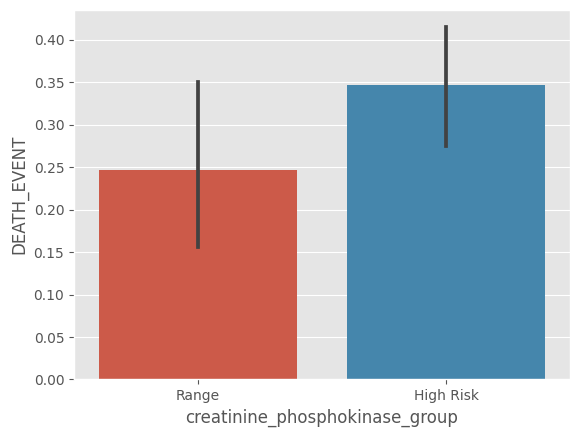

In [36]:
# checking the relationship between creatinine_phosphokinase and death rate
bins = [10, 120, np.nan]
labels = ['Range','High Risk']
df['creatinine_phosphokinase_group'] = pd.cut(df['creatinine_phosphokinase'], bins=bins, labels=labels)
sns.barplot(x='creatinine_phosphokinase_group', y='DEATH_EVENT', data=df)
plt.show()

The death rate of patients with high risk for creatinine_phosphokinase is higher than range one. 

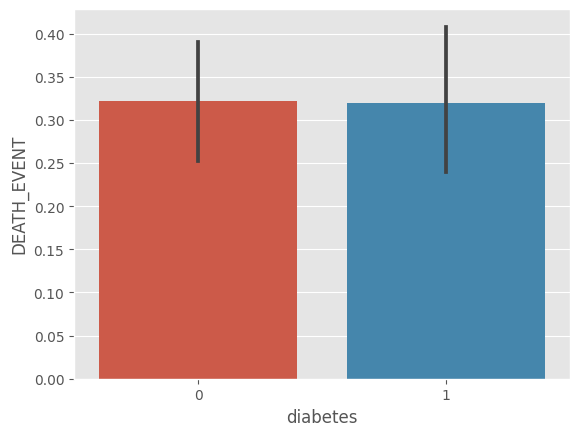

In [37]:
# checking the relationship between diabetes and death rate
sns.barplot(x='diabetes', y='DEATH_EVENT', data=df)
plt.show()

The death rate of patients with diabetes is the same as non-diabetes ones.

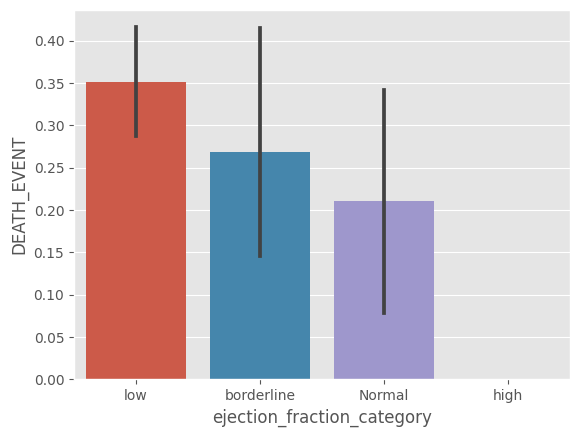

In [38]:
# checking the relationship between ejection_fraction category and death rate
bins = [0, 41, 50, 70, np.nan]
labels = ['low', 'borderline', 'Normal', 'high']
df['ejection_fraction_category'] = pd.cut(df['ejection_fraction'], bins=bins, labels=labels)

df['ejection_fraction_category'].value_counts()

sns.barplot(x='ejection_fraction_category', y='DEATH_EVENT', data=df)
plt.show()

The death rate of patients with low and borderline amount of ejection_fraction is higher than the normal and high
ones.

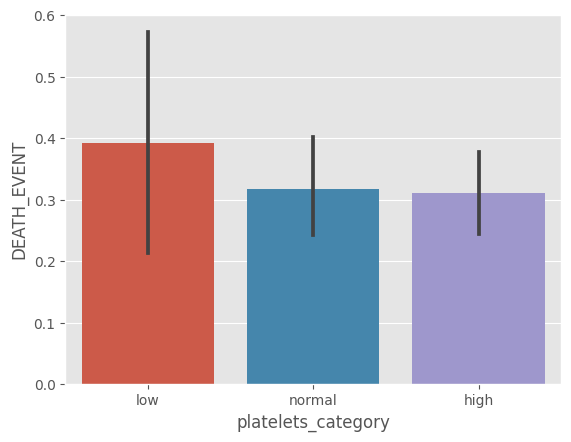

In [39]:
# checking the relationship between platelets category and death rate
bins =[0, 150000, 250000, np.nan]
labels =['low', 'normal', 'high']
df['platelets_category'] = pd.cut(df['platelets'], bins=bins, labels=labels)

sns.barplot(x='platelets_category', y='DEATH_EVENT', data=df)
plt.show()

The death rate of patients with low amount of platelets is higher than the normal and high ones.

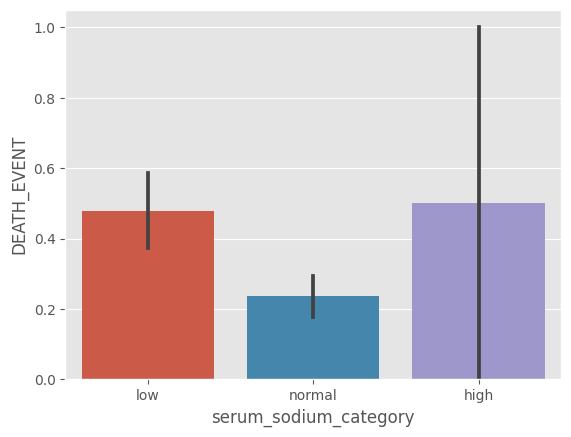

In [40]:
# checking the relationship between serum_sodium and death rate
bins =[125, 135, 145, np.nan]
labels =['low', 'normal', 'high']
df['serum_sodium_category'] = pd.cut(df['serum_sodium'], bins=bins, labels=labels)
sns.barplot(x='serum_sodium_category', y='DEATH_EVENT', data=df)
plt.show()

The death rate of patients with low and high amount of serum_sodium is higher than the normal ones.

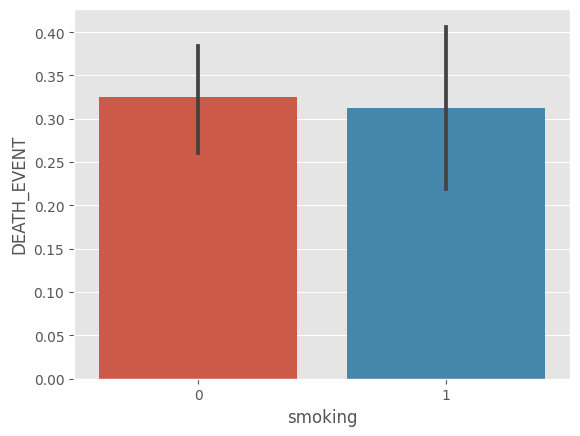

In [41]:
# checking the relationship between smoking and death rate
sns.barplot(x='smoking', y='DEATH_EVENT', data=df)
plt.show()

The death rate of smokers patients is the same as non-smokers ones.

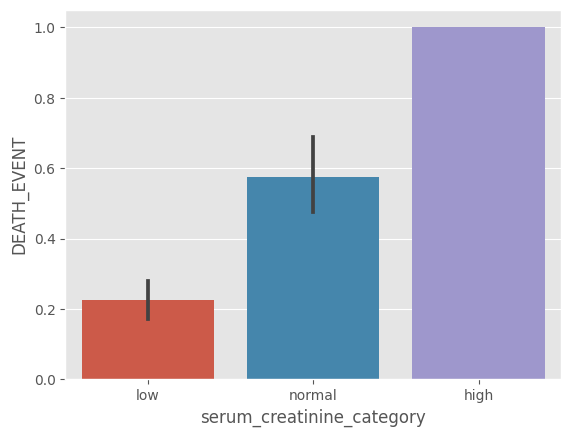

In [42]:
# checking the relationship between serum_creatinine and death rate
bins =[0.59, 1.35, 9, np.nan]
labels =['low', 'normal', 'high']
df['serum_creatinine_category'] = pd.cut(df['serum_creatinine'], bins=bins, labels=labels)
sns.barplot(x='serum_creatinine_category', y='DEATH_EVENT', data=df)
plt.show()

The death rate of patients with high amount of serum_cretinine is is higher than patients with the normal and low amount of serum_cretinine.

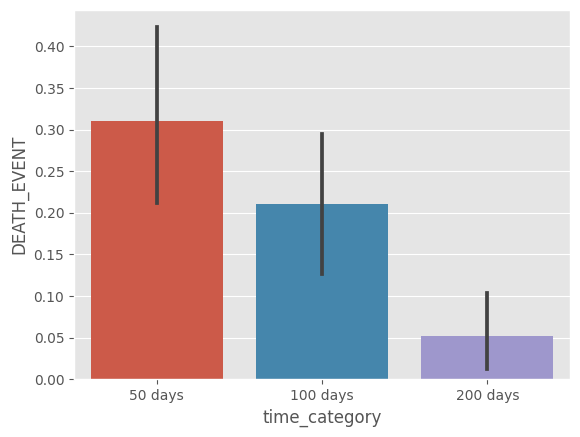

In [43]:
# checking the relationship between time and death rate
bins =[50, 100, 200, np.nan]
labels =['50 days', '100 days', '200 days']
df['time_category'] = pd.cut(df['time'], bins=bins, labels=labels)
sns.barplot(x='time_category', y='DEATH_EVENT', data=df)
plt.show()


It indicates that time has a negative effect on death events and in fewer follow-up days the death event is higher than the higher numbers of follow_up days. It is the most important factor as it would have been very crucial to get diagnosed early with heart issue so as to get timely treatment thus, reducing the chances of any fatality.


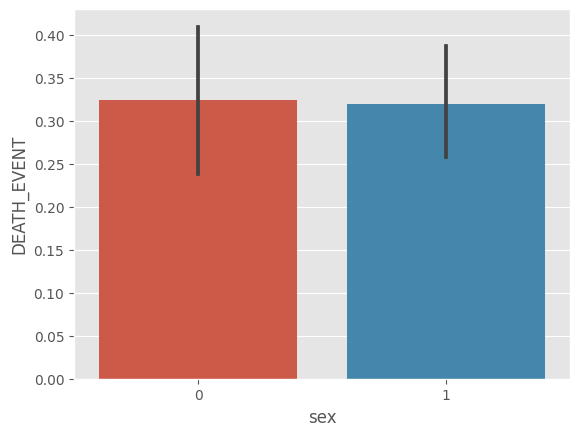

In [44]:
# checking the relationship between sex and death rate
sns.barplot(x='sex', y='DEATH_EVENT', data=df)
plt.show()

The death rate of male patients is the same as female ones.

Considering the relationship between the death rate and the other factors, sex, smoking, and diabetes are not effective on the death rate and both groups have the same results. On the other hand, anaemia and high blood pressure indicate the difference between the two groups. The factors creatinine_phosphokinase and serum_reatinine show more death rates in high values of these factors. For ejection fraction and platelet factors, the lower values represent the relationship with the death rate. Finally, serum sodium just for the normal values has a low death rate.

**How is the relationsip between the age, sex and death rate?**

In [45]:
# Analysis the age, sex and death-event relationship
import plotly.express as px
fig = px.violin(df, y="age", x="sex", color="DEATH_EVENT", box=True, points="all")
fig.update_layout(title_text="Analysis the range of Age and sex on Death_Event")
fig.show()

To conclude, the result shows that the range of age for male death is higher than the female however range of age for males and females that are alive is the same.

**How is the relationsip between the age, smoking and death rate?**

In [46]:
# Analysis the age, smoking and death-event relationship
fig = px.violin(df, y="age", x="smoking", color="DEATH_EVENT", box=True, points="all")
fig.update_layout(title_text="Analysis the range of Age and smoking on Death_Event")
fig.show()

The  age of the smoking dead patients (60 -72 years old) is higher than the alive patients (50-65 years old).

**How is the relationsip between the age, diabetes and death rate?**

In [47]:
# Analysis the age, diabetes and death-event relationship
fig = px.violin(df, y="age", x="diabetes", color="DEATH_EVENT", box=True, points="all")
fig.update_layout(title_text="Analysis the range of Age and diabetes on Death_Event")
fig.show()

The age of the diabetic dead patients is between 54-70 years old which is higher than the alive patients (50-65 years old).

**How is the relationsip between the age, high_blood_pressure and death rate?**

In [48]:
# Analysis the age, high_blood_pressure and death-event relationship
fig = px.violin(df,y="age", x="high_blood_pressure", color="DEATH_EVENT", box=True, points="all")
fig.update_layout(title_text="Analysis the range of Age and high_blood_pressure on Death_Event")
fig.show()

**How is the relationsip between the age, anaemia and death rate?**

The age of dead patients with high blood pressure is between 51-75 years old which is higher than the alive patients (53-66 years old).

In [49]:
# Analysis the age, anaemia and death-event relationship
fig = px.violin(df,y="age", x="anaemia", color="DEATH_EVENT", box=True, points="all")
fig.update_layout(title_text="Analysis the range of Age and  anaemia on Death_Event")
fig.show()

The age of dead patients with anaemia is between 58-75 years old which is higher than the alive patients (52-65 years old).

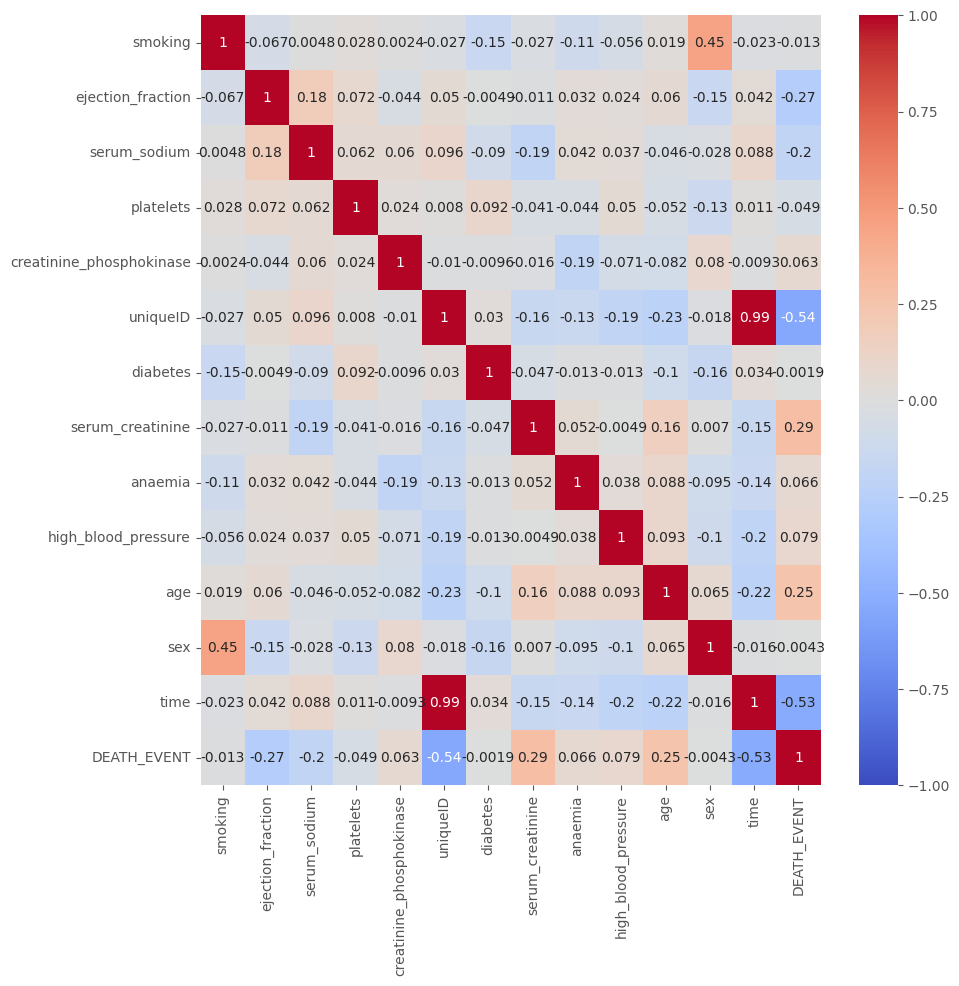

In [50]:
# Plot a heat map for enrichment the data
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), vmin=-1, cmap='coolwarm', annot=True);

In this heat map, it can be seen the relationship between all the factors affecting heart failure. As seen in the heat map time is the most important factor for reducing the chances of any fatality and it has the inverse relationship with the death event.

The second important factor is serum_creatinine which can affect the death event by increasing in the blood.  

The third factor is ejection_fraction which has a significant influence on death events. Also, serum_sodium influences death events and both of these factors have a negative relationship with death events. 

The last effective factor in death events is the age which has a positive relationship with death events. 

Considering sex and smoking, there is a positive relationship between them, and it indicates with increasing age the effect of smoking increases.  


<AxesSubplot: xlabel='time', ylabel='age'>

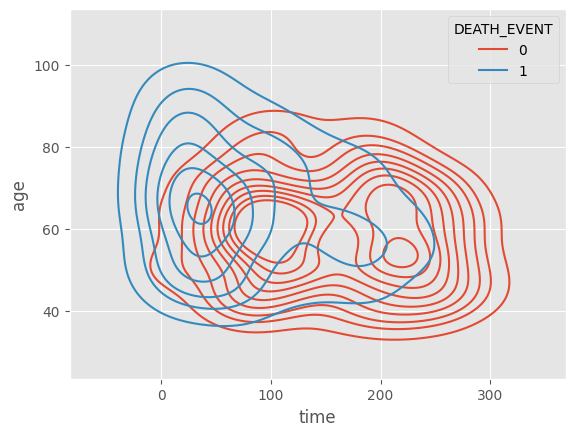

In [51]:
# Plotting Kernel Density Estimation of time and age factors
sns.kdeplot(x=df["time"], y=df["age"], hue = df["DEATH_EVENT"])

After plotting the heat map, I found time is the most important factor that can affect death events. By plotting the Kernel Density Estimation, the result shows that with fewer follow-up days, patients often died only when they aged more. The more follow-up days more the probability is, of any fatality. It can be seen time is a very crucial factor in heart failure.

In [52]:
# finding the number of death events in patients that had anaemia, diabetes, high blood pressure, smokers.
death_rate = df[df['DEATH_EVENT']==True]
anameia = death_rate['anaemia'].sum()
diabetes = death_rate['diabetes'].sum()
blood_pressure = death_rate['high_blood_pressure'].sum()
smokers = death_rate['smoking'].sum() 
patients ="DEAD patients: Anaemia:{}, diabetes:{}, high blood pressure:{}, smokers:{}".format(anameia, diabetes, blood_pressure, smokers)
print(patients)
# finding the total no of patients that had anaemia, diabetes, high blood pressure, smokers.
totala = df['anaemia'].sum()
totald = df['diabetes'].sum()
totalh = df['high_blood_pressure'].sum()
totals = df['smoking'].sum() 
patients ="Total Patients: Anaemia:{}, diabetes:{}, high blood pressure:{}, smokers:{}".format(totala, totald, totalh, totals)
print(patients)

DEAD patients: Anaemia:46, diabetes:40, high blood pressure:39, smokers:30
Total Patients: Anaemia:129, diabetes:125, high blood pressure:105, smokers:96


I found that patients with two or three factors have more susceptibility to death events.  

**Conclusions**

It can be seen in the data, the two factors, creatinine_phosphokinase, and serum_creatinine show a skewed distribution because of the many numbers of outliers. All the other factors almost show the normal distribution.

Finding the relationship between death event and the other features, the age over 80 years old, anaemia, high blood pressure, low amount of platelets, high-risk range of creatinine_phosphokinase and serum_cretinine and nonnormal range of serum sodium are the most effective factors on death events. On the other hand, smoking, diabetes, and gender do not influence death events. And for ejection fraction, the borderline and low numbers have the most effect on death events. In addition, time has a negative effect on death events and in fewer follow-up days the death event is higher than the higher numbers of follow-up days. It is the most important factor as it would have been very crucial to get diagnosed early with heart issues to get timely treatment thus, reducing the chances of any fatality. 

To conclude, the result shows that the range of age for male death is higher than the female however range of age for males and females that are alive is the same. The age of dead patients with for each feature of smoking, diabetes, high blood pressure, anaemia is higher than the alive patients. 

Totally, time is the most important factor for reducing the chances of any fatality and it has the inverse relationship with the death event. The second important factor is serum_creatinine which can affect the death event by increasing in the blood. The third factor is ejection_fraction which has a significant influence on death events. Also, serum_sodium influences death events and both factors have a negative relationship with death events. The last effective factor in death events is the age which has a positive relationship with death events.

Considering sex and smoking, there is a positive relationship between them, and it indicates with increasing age the effect of smoking increases.

I found that patients with two or three factors such as Anaemia, diabetes, high blood pressure, and smoking have more susceptibility to death events.

For future studies, it is better to have more data without a lot of outliers to find a better conclusion and analysis. As time is the most factor in this study, more details about the time of follow-up days or follow-up hours could be helpful. 

As seen the outliers in most of the factor’s data, decided to remove the outliers to get a better analysis of the data. Especially in some columns, many outliers were found such as creatinine_phosphokinase. However, removing the outliers did not change the result except for ejection fraction and platelets. Therefore, the outliers were not removed for getting a precise result and decision. In addition, removing the outliers decreases one-third of the data which causes missing a large part of the data. 

For early detection, considering time is a vital factor for the patients. After that, checking the amount of serum_creatinine, ejection_fraction, and serum_sodium is recommended which is very essential to decrease the rate of death. And the final recommendation is related to the range of age, which shows with seniors age the risk of heart failure and death events is increasing and must be considered. 

